Figure out what does the value means in the txt file  

**conclusion:**    

0. category - 0, 1, 2
1. x_center
2. y_center
3. width
4. height

In [1]:
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
def draw_boxes(image_path, txt_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_height, image_width, _ = image.shape

    # Read bounding box values from text file
    with open(txt_path, 'r') as file:
        lines = file.readlines()

    # Draw bounding boxes
    image_with_boxes = image.copy()
    for line in lines:
        # Parse the line
        values = line.strip().split()
        class_id = int(values[0])
        x_center, y_center, width, height = map(float, values[1:])

        # Convert to pixel coordinates
        x_center_pixel = int(x_center * image_width)
        y_center_pixel = int(y_center * image_height)
        width_pixel = int(width * image_width)
        height_pixel = int(height * image_height)

        # Calculate corners of the bounding box
        top_left_x = int(x_center_pixel - width_pixel / 2)
        top_left_y = int(y_center_pixel - height_pixel / 2)
        bottom_right_x = int(x_center_pixel + width_pixel / 2)
        bottom_right_y = int(y_center_pixel + height_pixel / 2)

        # Draw the bounding box
        color = (255, 0, 0) 
        cv2.rectangle(image_with_boxes, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, 2)
    
    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(image_with_boxes)
    plt.axis('off')
    plt.show()


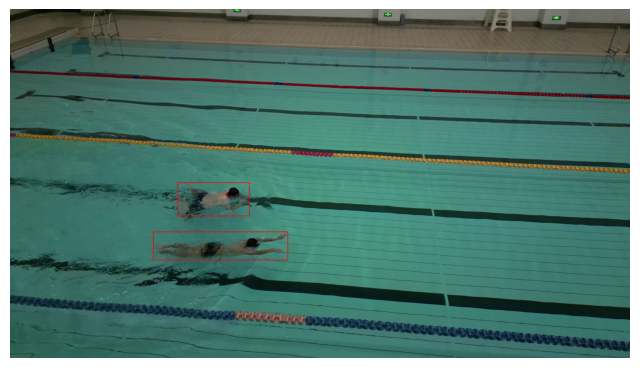

In [3]:
# Example usage
img_path = r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\data\images\train\000001.jpg'
txt_path = r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\data\labels\train\000001.txt'
draw_boxes(img_path, txt_path)

Crop the people out 

In [4]:
def crop_and_save_images(images_folder, labels_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Initialize counters for each class category
    class_counters = {}

    # Loop through all image files in the images folder
    for image_file in os.listdir(images_folder):
        if image_file.endswith('.jpg'):
            # Get the base name (without extension)
            base_name = os.path.splitext(image_file)[0]
            
            # Corresponding txt file
            label_file = os.path.join(labels_folder, f"{base_name}.txt")
            image_path = os.path.join(images_folder, image_file)
            
            # Check if the label file exists
            if not os.path.exists(label_file):
                continue

            # Load the image
            image = cv2.imread(image_path)
            image_height, image_width, _ = image.shape
            
            # Read the label file
            with open(label_file, 'r') as file:
                lines = file.readlines()
            
            # Loop through each line in the label file
            for line in lines:
                values = line.strip().split()
                class_id = int(values[0])
                x_center, y_center, width, height = map(float, values[1:])

                # Convert YOLO format to pixel coordinates
                x_center_pixel = int(x_center * image_width)
                y_center_pixel = int(y_center * image_height)
                width_pixel = int(width * image_width)
                height_pixel = int(height * image_height)

                # Calculate corners of the bounding box
                top_left_x = max(0, int(x_center_pixel - width_pixel / 2))
                top_left_y = max(0, int(y_center_pixel - height_pixel / 2))
                bottom_right_x = min(image_width, int(x_center_pixel + width_pixel / 2))
                bottom_right_y = min(image_height, int(y_center_pixel + height_pixel / 2))

                # Crop the detected person
                crop = image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]

                # Initialize counter for the current class if not present
                if class_id not in class_counters:
                    class_counters[class_id] = 0

                # Generate the filename based on the class
                if class_id == 0:
                    file_name = str(class_counters[class_id]).zfill(6)
                elif class_id == 1:
                    file_name = str(class_counters[class_id] + 100000)
                else:
                    file_name = str(class_counters[class_id] + 200000)
                
                crop_filename = f"{file_name}.jpg"
                
                # Save the cropped image
                cv2.imwrite(os.path.join(output_folder, crop_filename), crop)
                
                # Increment the class counter
                class_counters[class_id] += 1


In [5]:
train_images_folder = r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\data\images\train'
train_labels_folder = r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\data\labels\train'
train_output_folder = r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\train'

val_images_folder = r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\data\images\val'
val_labels_folder = r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\data\labels\val'
val_output_folder = r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\val'

In [6]:
crop_and_save_images(train_images_folder, train_labels_folder, train_output_folder)

In [7]:
crop_and_save_images(val_images_folder, val_labels_folder, val_output_folder)